In [2]:
#pip install scvelo

  Using cached scvelo-0.2.4-py3-none-any.whl (196 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
conda install -c conda-forge leidenalg


Note: you may need to restart the kernel to use updated packages.


In [39]:
#pip install python-igraph

  Using cached python_igraph-0.9.10-py3-none-any.whl (9.1 kB)
     ---------------------------------------- 2.8/2.8 MB 9.4 MB/s eta 0:00:00
  Using cached texttable-1.6.4-py2.py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [45]:
#pip install louvain

You should consider upgrading via the 'C:\Users\KKo1\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [44]:
#pip install scanpy[leiden]


     ------------------------------------ 104.9/104.9 KB 860.8 kB/s eta 0:00:00


In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.4 (python 3.8.13) on 2024-08-06 14:13.


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.1 anndata==0.9.2 umap==0.5.2 numpy==1.20.0 scipy==1.8.0 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6


In [3]:
import os
os.chdir('D:/KP/EKP_RKP')

In [4]:
import scanpy.external as sce

In [5]:
adata_1 = sc.read('EKP_epi_pp.h5ad')
adata_2 = sc.read('RKP_epi_pp.h5ad')

In [6]:
adata_1

AnnData object with n_obs × n_vars = 736 × 17666
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden'
    var: 'gene_ids_2', 'feature_types_2', 'n_cells_2', 'mt_2', 'n_cells_by_counts_2', 'mean_counts_2', 'pct_dropout_by_counts_2', 'total_counts_2'
    uns: 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
adata_2

AnnData object with n_obs × n_vars = 1116 × 17708
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden'
    var: 'gene_ids_2', 'feature_types_2', 'n_cells_2', 'mt_2', 'n_cells_by_counts_2', 'mean_counts_2', 'pct_dropout_by_counts_2', 'total_counts_2'
    uns: 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [8]:
adata_1.var_names_make_unique()
adata_2.var_names_make_unique()

In [9]:
adata_A = adata_1.concatenate(adata_2,
                               batch_key='batch')

In [10]:
adata_A.write('epi_concatenated_raw.h5ad',compression='gzip' )# save concatenated adata as adata_raw.h5ad

In [11]:
raw = sc.read('epi_concatenated_raw.h5ad')

In [56]:
# scanpy-based processed file: 2_EKP_RKP_epithelial_cell_with_more_genes_04-30-24
processed = sc.read('Epi_after_harmony_more_genes_04-30-24.h5ad')
processed

AnnData object with n_obs × n_vars = 1832 × 20470
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'EKP_RKP_Tumor_rank_fgsea', 'Leiden_Tumor_rank_fgsea', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [13]:
#EKP
adata_1_ldata = sc.read('D:/KP/EKP_RKP/EKP/velocyto/EKP.loom')
adata_1_ldata.var_names_make_unique() 

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [15]:
#RKP
adata_2_ldata = sc.read('D:/KP/EKP_RKP/RKP/velocyto/RKP.loom')
adata_2_ldata.var_names_make_unique() 

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [16]:
ldata = adata_1_ldata.concatenate(adata_2_ldata,
                                  batch_categories=['EKP','RKP'])

In [17]:
ldata.write('ldata_raw.h5ad', compression='gzip')    # save concatenated ldata as ldata_raw.h5ad

In [18]:
raw

AnnData object with n_obs × n_vars = 1852 × 16482
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1'
    obsm: 'X_pca', 'X_umap'

In [23]:
raw.obs

n_genes  n_genes_by_counts  total_counts  \
AAACCCACAGTATGAA-1-0     3835               3829       16049.0   
AAACGAAAGTAGGGTC-1-0      338                338        1239.0   
AAACGAATCTCGCTTG-1-0      656                656        1903.0   
AAACGCTAGTGGCGAT-1-0     4898               4898       26809.0   
AAACGCTCATGGAATA-1-0     4000               4000       21023.0   
...                       ...                ...           ...   
TTTGATCCATGACTTG-1-1      694                694        1473.0   
TTTGGAGGTCTCGCGA-1-1     1346               1344        4410.0   
TTTGGAGTCATGGTAC-1-1      294                294         625.0   
TTTGTTGCAACAGCCC-1-1      236                236         940.0   
TTTGTTGCAGGATTCT-1-1      406                406        1057.0   

                      total_counts_mt  pct_counts_mt tissue type leiden batch  
AAACCCACAGTATGAA-1-0           1046.0       6.517540    NaN  NaN    NaN     0  
AAACGAAAGTAGGGTC-1-0              1.0       0.080710    NaN  NaN    NaN     0  
AAACGAATCTCGCTTG-1-0            570.0      29.952705    NaN  NaN    NaN     0  
AAACGCTAGTGGCGAT-1-0            977.0       3.644298    NaN  NaN    NaN     0  
AAACGCTCATGGAATA-1-0            548.0       2.606669    NaN  NaN    NaN     0  
...                               ...            ...    ...  ...    ...   ...  
TTTGATCCATGACTTG-1-1              2.0       0.135777    NaN  NaN    NaN     1  
TTTGGAGGTCTCGCGA-1-1             80.0       1.814059    NaN  NaN    NaN     1  
TTTGGAGTCATGGTAC-1-1              7.0       1.120000    NaN  NaN    NaN     1  
TTTGTTGCAACAGCCC-1-1            617.0      65.638298    NaN  NaN    NaN     1  
TTTGTTGCAGGATTCT-1-1              2.0       0.189215    NaN  NaN    NaN     1  

[1852 rows x 9 columns]

In [19]:
processed

AnnData object with n_obs × n_vars = 1832 × 20470
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'EKP_RKP_Tumor_rank_fgsea', 'Leiden_Tumor_rank_fgsea', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [24]:
processed.obs

batch sample_batch     tissue type leiden  n_genes  \
AAACCCACAGTATGAA     0         -1-0  allograft  EKP      0     3835   
AAACGAAAGTAGGGTC     0         -1-0  allograft  EKP      2      338   
AAACGAATCTCGCTTG     0         -1-0  allograft  EKP      2      656   
AAACGCTAGTGGCGAT     0         -1-0  allograft  EKP      0     4898   
AAACGCTCATGGAATA     0         -1-0  allograft  EKP      0     4000   
...                ...          ...        ...  ...    ...      ...   
TTTGATCCATGACTTG     1         -1-1  allograft  RKP      2      694   
TTTGGAGGTCTCGCGA     1         -1-1  allograft  RKP      2     1346   
TTTGGAGTCATGGTAC     1         -1-1  allograft  RKP      2      294   
TTTGTTGCAACAGCCC     1         -1-1  allograft  RKP      1      236   
TTTGTTGCAGGATTCT     1         -1-1  allograft  RKP      1      406   

                  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCACAGTATGAA               3835       16059.0           1046.0   
AAACGAAAGTAGGGTC                338        1239.0              1.0   
AAACGAATCTCGCTTG                656        1903.0            570.0   
AAACGCTAGTGGCGAT               4898       26809.0            977.0   
AAACGCTCATGGAATA               4000       21023.0            548.0   
...                             ...           ...              ...   
TTTGATCCATGACTTG                694        1473.0              2.0   
TTTGGAGGTCTCGCGA               1346        4412.0             80.0   
TTTGGAGTCATGGTAC                294         625.0              7.0   
TTTGTTGCAACAGCCC                236         940.0            617.0   
TTTGTTGCAGGATTCT                406        1057.0              2.0   

                  pct_counts_mt  total_counts_rpl  pct_counts_rpl  \
AAACCCACAGTATGAA       6.513482               0.0             0.0   
AAACGAAAGTAGGGTC       0.080710               0.0             0.0   
AAACGAATCTCGCTTG      29.952705               0.0             0.0   
AAACGCTAGTGGCGAT       3.644298               0.0             0.0   
AAACGCTCATGGAATA       2.606669               0.0             0.0   
...                         ...               ...             ...   
TTTGATCCATGACTTG       0.135777               0.0             0.0   
TTTGGAGGTCTCGCGA       1.813237               0.0             0.0   
TTTGGAGTCATGGTAC       1.120000               0.0             0.0   
TTTGTTGCAACAGCCC      65.638298               0.0             0.0   
TTTGTTGCAGGATTCT       0.189215               0.0             0.0   

                  total_counts_rps  pct_counts_rps  
AAACCCACAGTATGAA               0.0             0.0  
AAACGAAAGTAGGGTC               0.0             0.0  
AAACGAATCTCGCTTG               0.0             0.0  
AAACGCTAGTGGCGAT               0.0             0.0  
AAACGCTCATGGAATA               0.0             0.0  
...                            ...             ...  
TTTGATCCATGACTTG               0.0             0.0  
TTTGGAGGTCTCGCGA               0.0             0.0  
TTTGGAGTCATGGTAC               0.0             0.0  
TTTGTTGCAACAGCCC               0.0             0.0  
TTTGTTGCAGGATTCT               0.0             0.0  

[1832 rows x 14 columns]

In [27]:
processed.obs['leiden']

AAACCCACAGTATGAA    0
AAACGAAAGTAGGGTC    2
AAACGAATCTCGCTTG    2
AAACGCTAGTGGCGAT    0
AAACGCTCATGGAATA    0
                   ..
TTTGATCCATGACTTG    2
TTTGGAGGTCTCGCGA    2
TTTGGAGTCATGGTAC    2
TTTGTTGCAACAGCCC    1
TTTGTTGCAGGATTCT    1
Name: leiden, Length: 1832, dtype: category
Categories (6, object): ['0', '1', '2', '3', '4', '5']

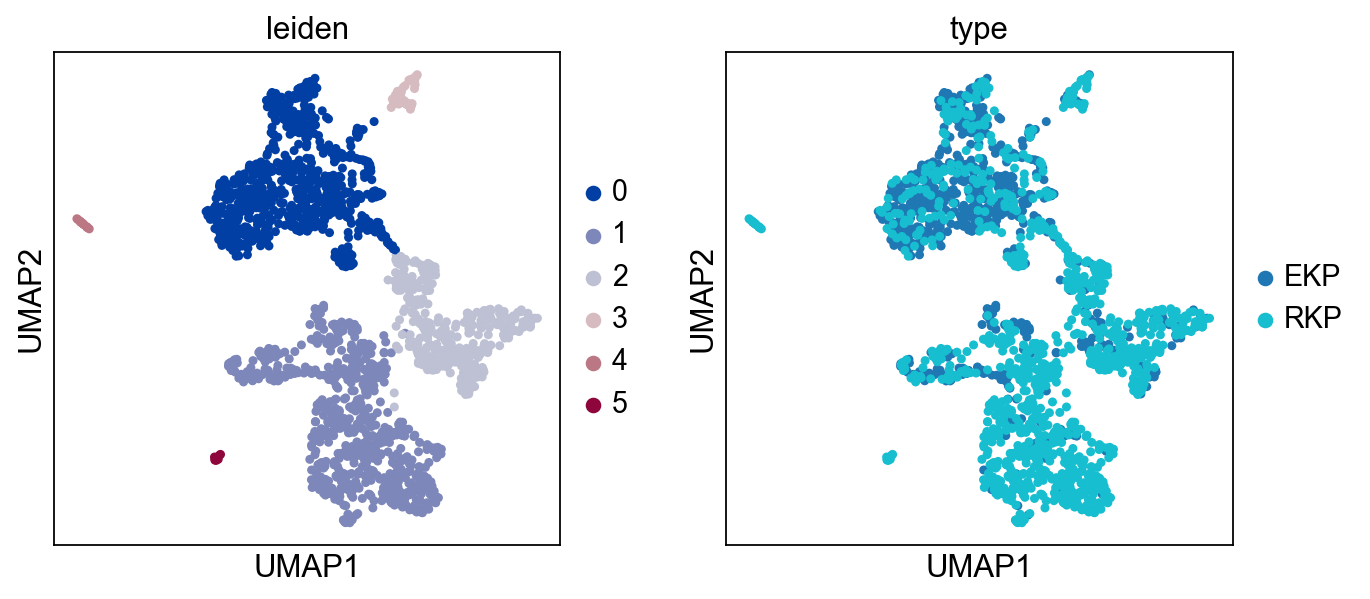

In [20]:
sc.pl.umap(processed, color=['leiden','type'])

In [30]:
raw.obs['leiden']= processed.obs['leiden']
raw.obs['type']= processed.obs['type']
raw.obs['tissue']= processed.obs['tissue']
data=raw[raw.obs['leiden'].isin(['0', '1', '2', '3', '4', '5'])]    # copy all the leiden clusters

In [31]:
data.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCACAGTATGAA     3835               3829       16049.0           1046.0   
AAACGAAAGTAGGGTC      338                338        1239.0              1.0   
AAACGAATCTCGCTTG      656                656        1903.0            570.0   
AAACGCTAGTGGCGAT     4898               4898       26809.0            977.0   
AAACGCTCATGGAATA     4000               4000       21023.0            548.0   
...                   ...                ...           ...              ...   
TTTGATCCATGACTTG      694                694        1473.0              2.0   
TTTGGAGGTCTCGCGA     1346               1344        4410.0             80.0   
TTTGGAGTCATGGTAC      294                294         625.0              7.0   
TTTGTTGCAACAGCCC      236                236         940.0            617.0   
TTTGTTGCAGGATTCT      406                406        1057.0              2.0   

                  pct_counts_mt     tissue type leiden batch sample_batch  
AAACCCACAGTATGAA       6.517540  allograft  EKP      0     0         -1-0  
AAACGAAAGTAGGGTC       0.080710  allograft  EKP      2     0         -1-0  
AAACGAATCTCGCTTG      29.952705  allograft  EKP      2     0         -1-0  
AAACGCTAGTGGCGAT       3.644298  allograft  EKP      0     0         -1-0  
AAACGCTCATGGAATA       2.606669  allograft  EKP      0     0         -1-0  
...                         ...        ...  ...    ...   ...          ...  
TTTGATCCATGACTTG       0.135777  allograft  RKP      2     1         -1-1  
TTTGGAGGTCTCGCGA       1.814059  allograft  RKP      2     1         -1-1  
TTTGGAGTCATGGTAC       1.120000  allograft  RKP      2     1         -1-1  
TTTGTTGCAACAGCCC      65.638298  allograft  RKP      1     1         -1-1  
TTTGTTGCAGGATTCT       0.189215  allograft  RKP      1     1         -1-1  

[1832 rows x 10 columns]

In [32]:
data.uns['leiden_colors']=processed.uns['leiden_colors']    # keep same leiden color as adata_processed.h5ad
data.obsm['X_umap']=processed.obsm['X_umap']    # keep same UMAP as adata_processed.h5ad

In [33]:
ldata=sc.read('ldata_raw.h5ad', compression='gzip')
adata_scvelo = scv.utils.merge(data, ldata)    # copy splicing information to data, use adata_scvelo for RNA velocity

In [34]:
adata_scvelo

AnnData object with n_obs × n_vars = 1832 × 16482
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_pca', 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

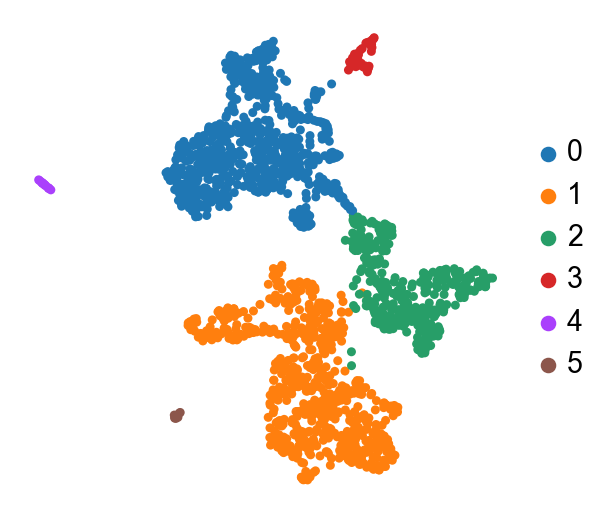

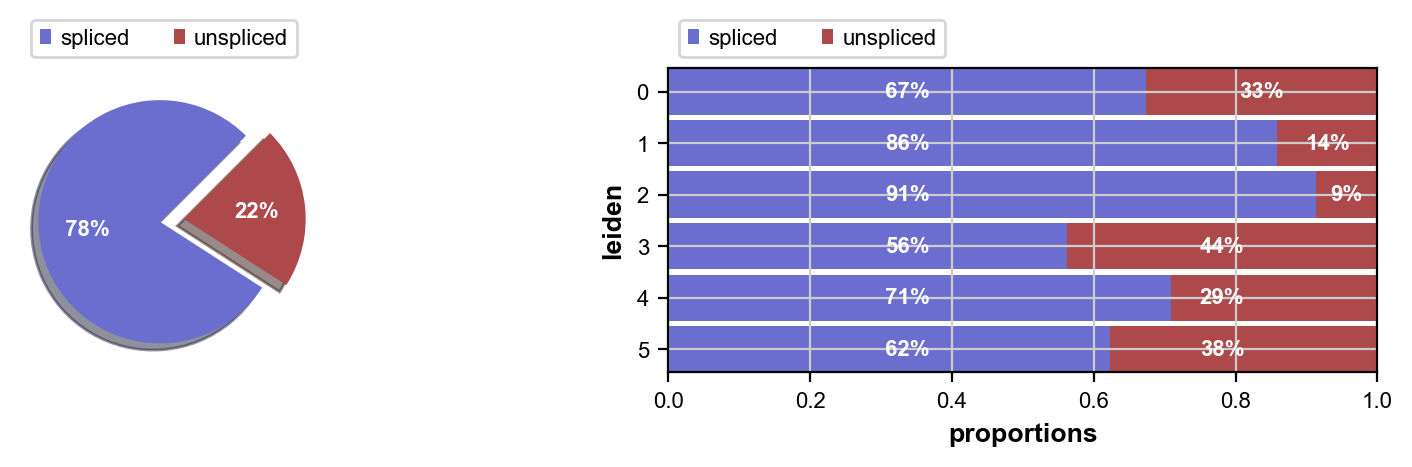

In [35]:
sc.pl.umap(adata_scvelo, color=['leiden'], legend_loc='right margin', frameon=False, title='', use_raw=False)    #check UMAP
scv.pl.proportions(adata_scvelo, groupby='leiden')    # check splicing informatin

In [36]:
adata_scvelo.write('adata_sliced_and_copied.h5ad')

In [37]:
adata = sc.read('adata_sliced_and_copied.h5ad')

In [38]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000, enforce=True)
scv.pp.log1p(adata)
adata

Filtered out 8183 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


AnnData object with n_obs × n_vars = 1832 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [39]:
##n_neighbors=10 test ###This was the best
## n_pcs increased to make more clusters =50

scv.pp.moments(adata, n_pcs=50, n_neighbors=10)
adata

computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


AnnData object with n_obs × n_vars = 1832 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'leiden_colors', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
running Leiden clustering
    finished: found 19 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


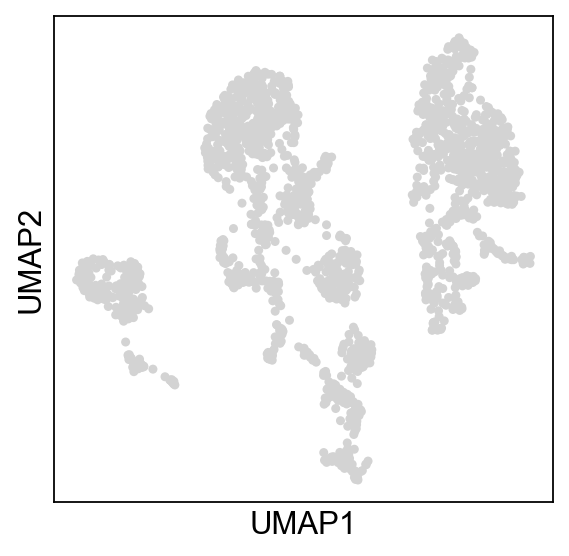

In [40]:
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata)

In [41]:
scv.tl.recover_dynamics(adata, n_jobs=16)
scv.tl.velocity(adata, mode='dynamical', use_raw=False)
scv.tl.velocity_graph(adata, n_jobs=16)
adata

recovering dynamics (using 16/16 cores)


  0%|          | 0/632 [00:00<?, ?gene/s]

    finished (0:00:44) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 16/16 cores)


  0%|          | 0/1832 [00:00<?, ?cells/s]

    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


AnnData object with n_obs × n_vars = 1832 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'leiden_colors', 'neighbors', 'umap', 'leide

KeyError: 'Could not find key Muc4 in .var_names or .obs.columns.'

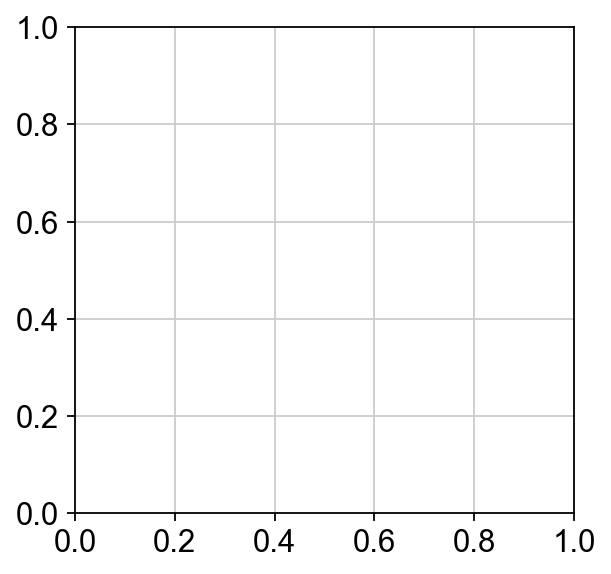

In [77]:
sc.pl.umap(adata, color=['Muc4'])

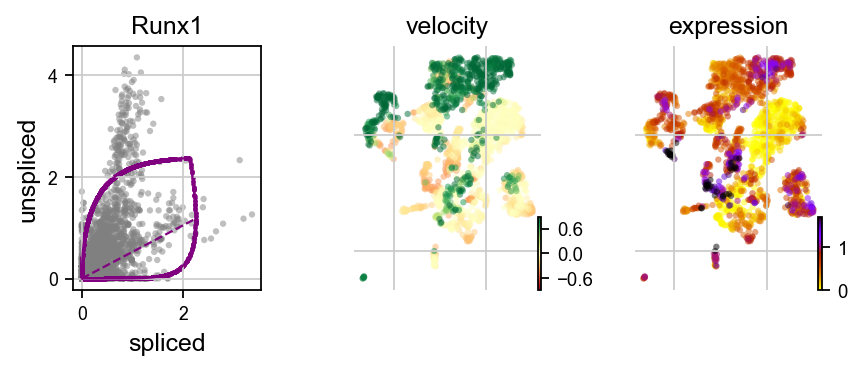

In [69]:
scv.pl.velocity(adata, var_names=['Runx1','Aqp5'], use_raw=False)

In [12]:
#scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
#adata

In [43]:
#############################################################
############ Harmony batch correction #######################
#############################################################

sce.pp.harmony_integrate(adata, 'batch')
'X_pca_harmony' in adata.obsm
True

2024-07-24 12:20:09,751 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-07-24 12:20:10,284 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-07-24 12:20:10,296 - harmonypy - INFO - Iteration 1 of 10
2024-07-24 12:20:10,523 - harmonypy - INFO - Iteration 2 of 10
2024-07-24 12:20:10,739 - harmonypy - INFO - Iteration 3 of 10
2024-07-24 12:20:10,964 - harmonypy - INFO - Converged after 3 iterations


True

In [44]:
adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)


computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


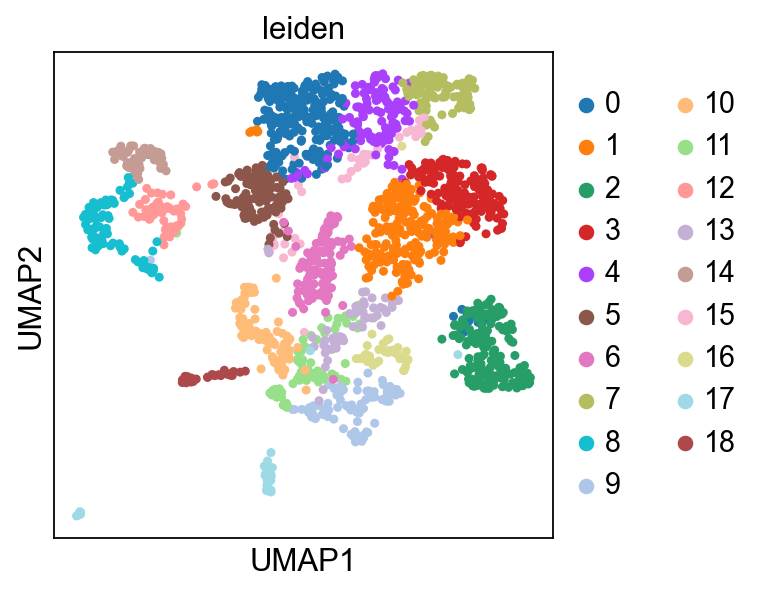

In [45]:
sc.pl.umap(adata, color=['leiden'])

running Leiden clustering
    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


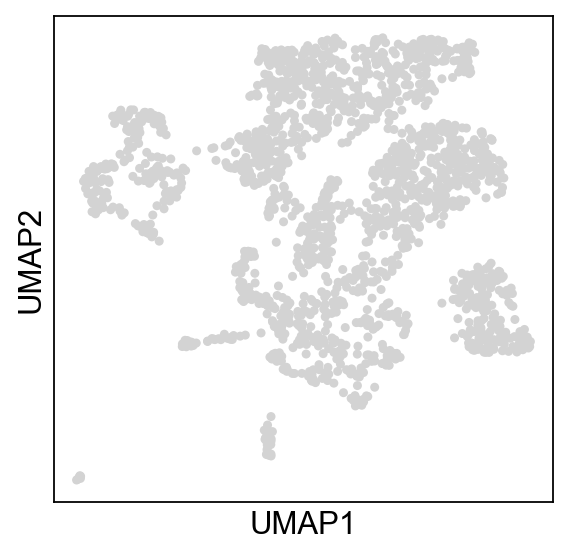

In [46]:
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata)

In [47]:
##n_neighbors=10 test ###This was the best
## n_pcs increased to make more clusters =50

scv.pp.moments(adata, n_pcs=50, n_neighbors=15)
adata

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


AnnData object with n_obs × n_vars = 1832 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'leiden_colors', 'neighbors', 'umap', 'leide

computing velocity graph (using 1/16 cores)


  0%|          | 0/1832 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


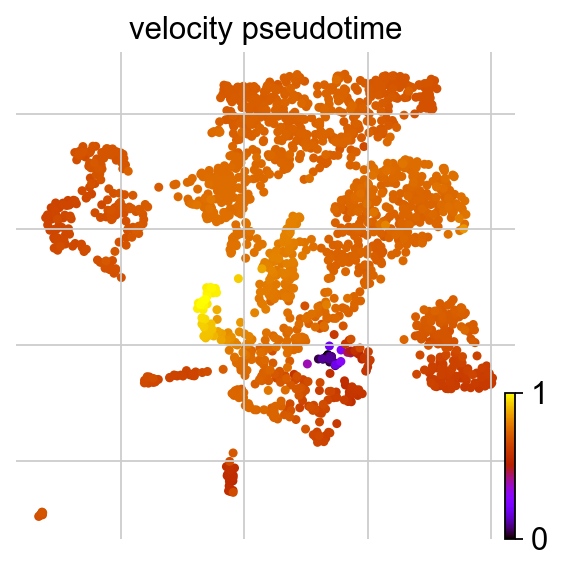

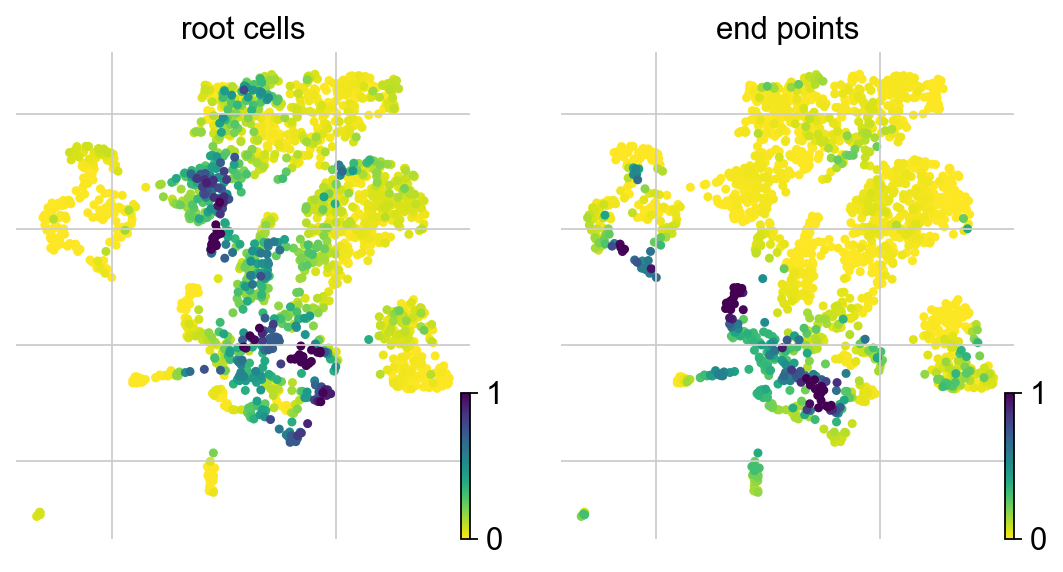

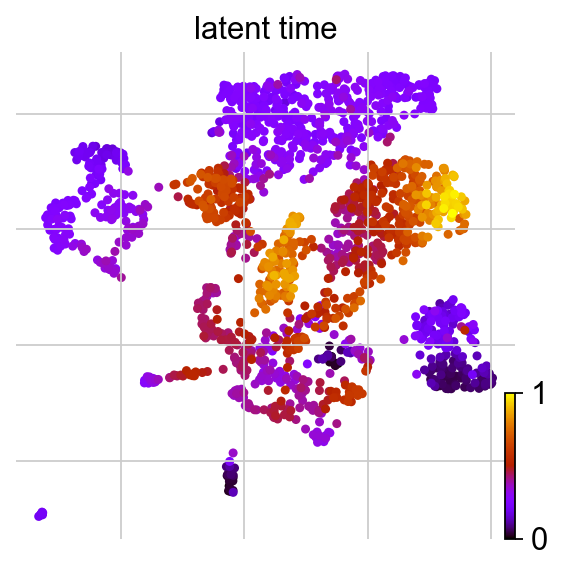

In [48]:
###### for the latent_time Umap ############
##### mode_neighbors can be removed#########
##### save the plots after comparison######

scv.tl.velocity_graph(adata,n_neighbors=15, mode_neighbors='connectivities')
scv.tl.terminal_states(adata)
scv.tl.latent_time(adata)

scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')
scv.pl.scatter(adata, color=['root_cells', 'end_points'])
scv.pl.scatter(adata, color='latent_time', cmap='gnuplot')


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


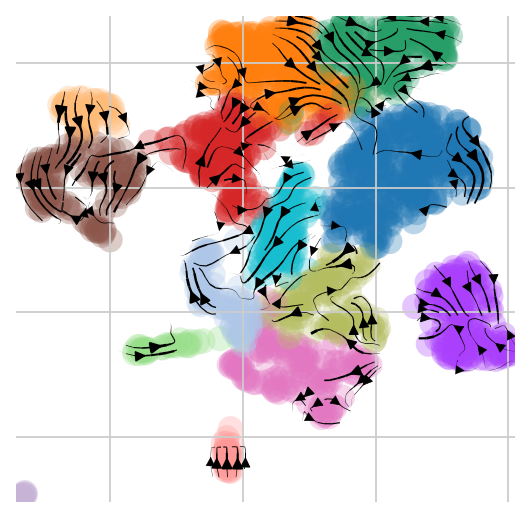

In [49]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['leiden'], legend_loc='none', title='', use_raw=False, frameon=False)#, save='type1_from_2nd_try.pdf')

In [50]:
##n_neighbors=10 test ###This was the best
## n_pcs increased to make more clusters =50

scv.pp.moments(adata, n_pcs=50, n_neighbors=25)
adata

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


AnnData object with n_obs × n_vars = 1832 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'vel

computing velocity graph (using 1/16 cores)


  0%|          | 0/1832 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


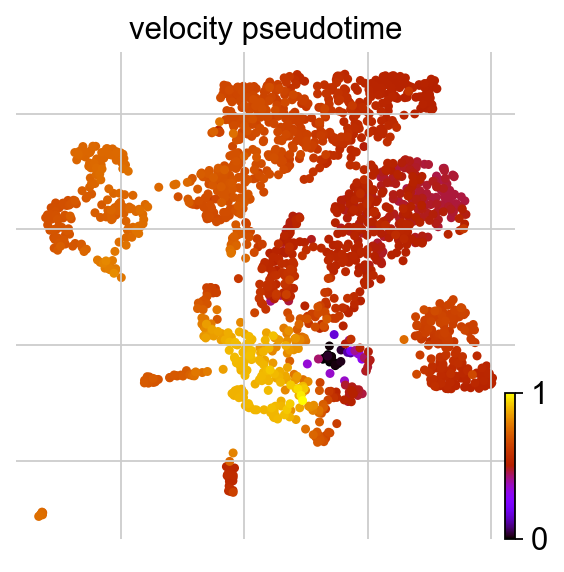

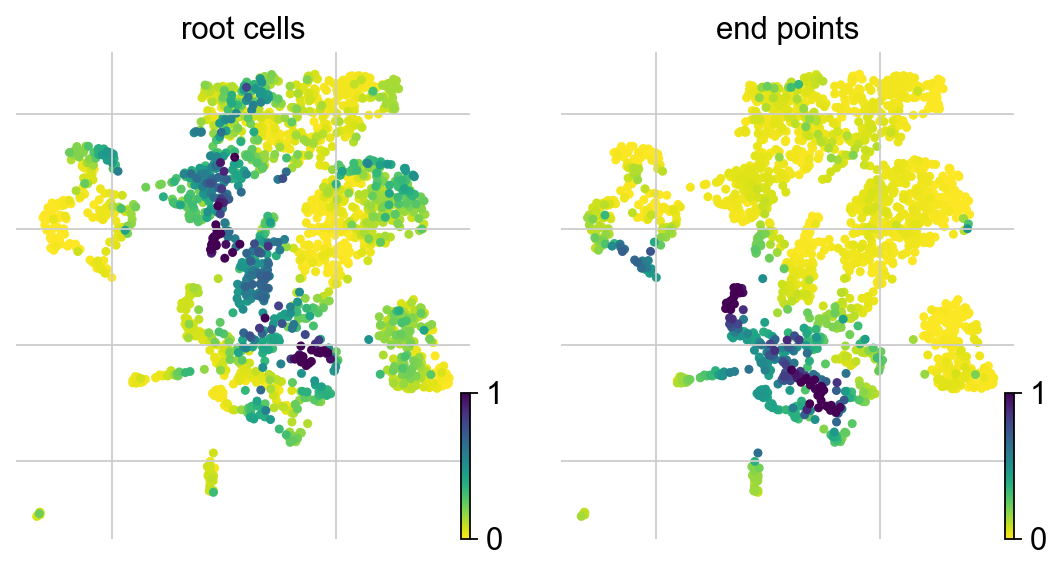

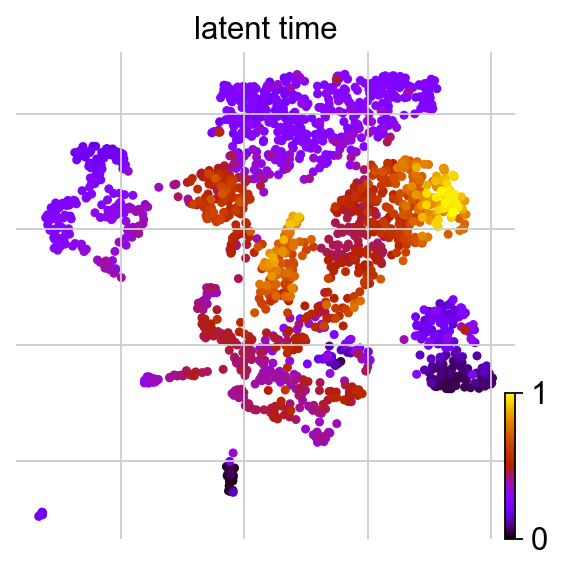

In [51]:
###### for the latent_time Umap ############
##### mode_neighbors can be removed#########
##### save the plots after comparison######

scv.tl.velocity_graph(adata,n_neighbors=25, mode_neighbors='connectivities')
scv.tl.terminal_states(adata)
scv.tl.latent_time(adata)

scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')
scv.pl.scatter(adata, color=['root_cells', 'end_points'])
scv.pl.scatter(adata, color='latent_time', cmap='gnuplot')


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


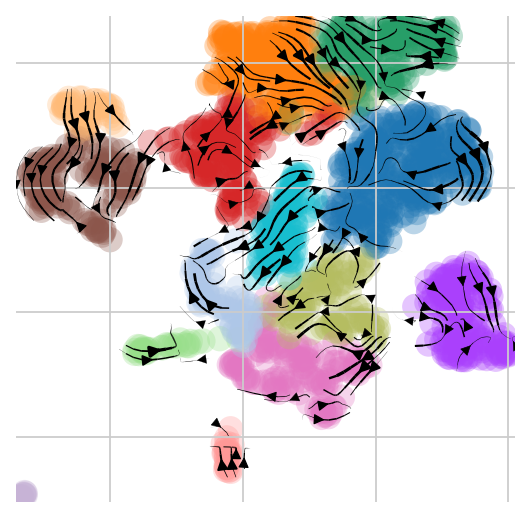

In [52]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['leiden'], legend_loc='none', title='', use_raw=False, frameon=False)#, save='type1_from_2nd_try.pdf')

In [53]:
##n_neighbors=10 test ###This was the best
## n_pcs increased to make more clusters =50

scv.pp.moments(adata, n_pcs=50, n_neighbors=30)
adata

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


AnnData object with n_obs × n_vars = 1832 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'vel

computing velocity graph (using 1/16 cores)


  0%|          | 0/1832 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


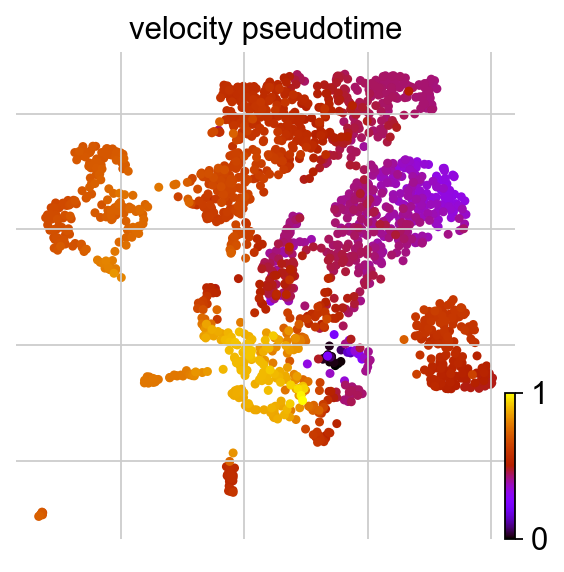

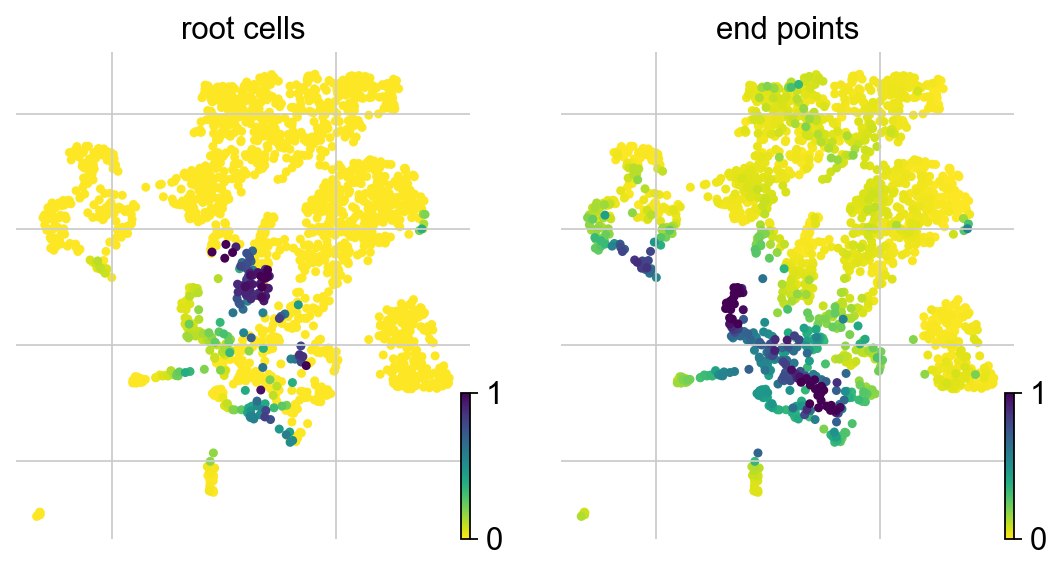

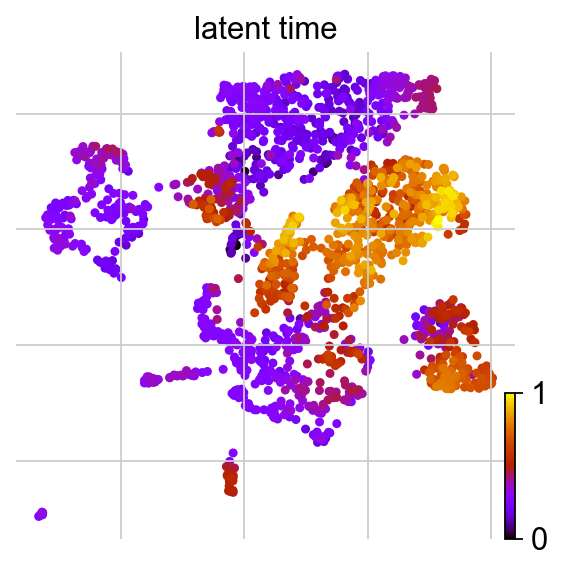

In [54]:
###### for the latent_time Umap ############
##### mode_neighbors can be removed#########
##### save the plots after comparison######

scv.tl.velocity_graph(adata,n_neighbors=30, mode_neighbors='connectivities')
scv.tl.terminal_states(adata)
scv.tl.latent_time(adata)

scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')
scv.pl.scatter(adata, color=['root_cells', 'end_points'])
scv.pl.scatter(adata, color='latent_time', cmap='gnuplot')


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


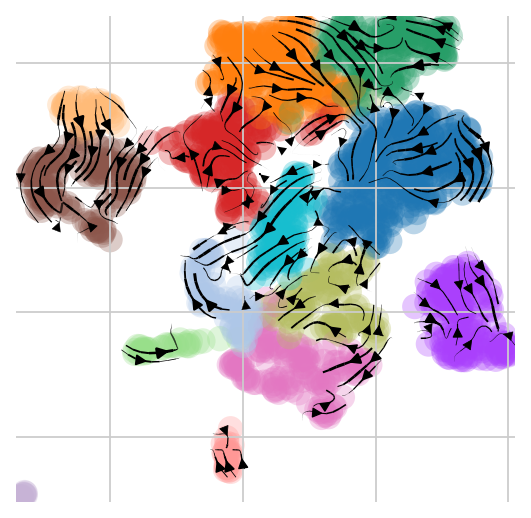

In [55]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['leiden'], legend_loc='none', title='', use_raw=False, frameon=False)#, save='type1_from_2nd_try.pdf')

In [56]:
##n_neighbors=10 test ###This was the best
## n_pcs increased to make more clusters =50

scv.pp.moments(adata, n_pcs=50, n_neighbors=5)
adata

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


AnnData object with n_obs × n_vars = 1832 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'vel

computing velocity graph (using 1/16 cores)


  0%|          | 0/1832 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 5 regions of root cells and 8 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


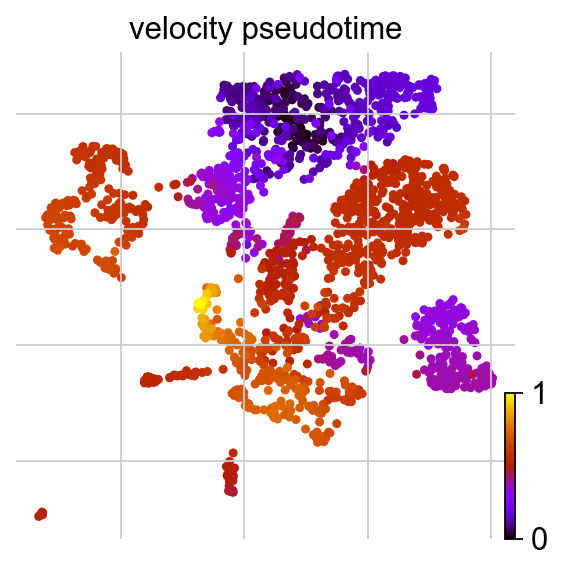

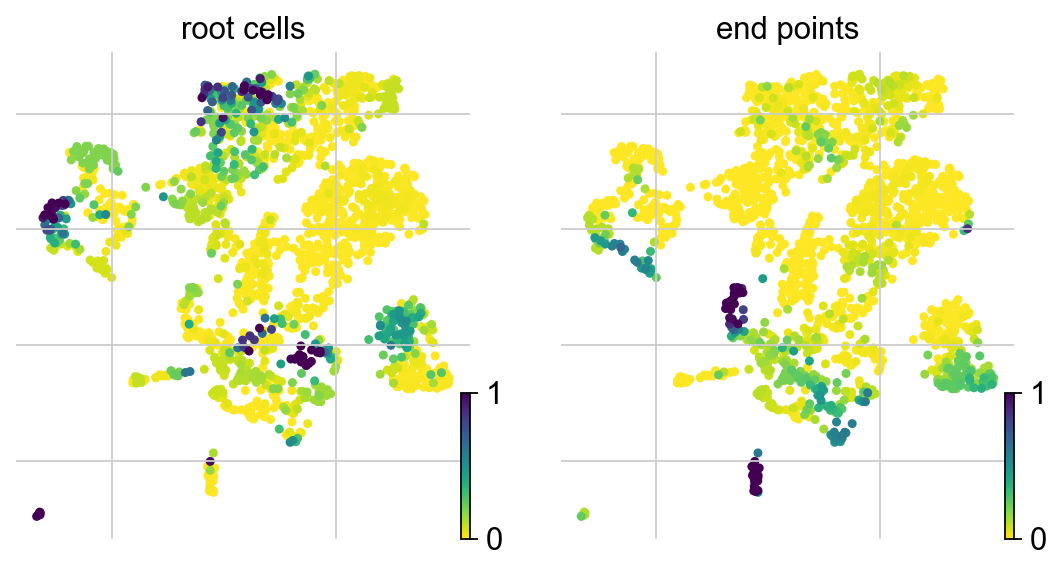

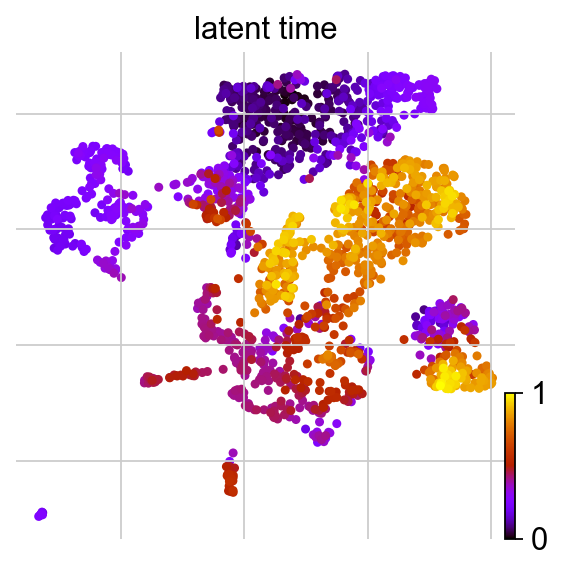

In [57]:
###### for the latent_time Umap ############
##### mode_neighbors can be removed#########
##### save the plots after comparison######

scv.tl.velocity_graph(adata,n_neighbors=5, mode_neighbors='connectivities')
scv.tl.terminal_states(adata)
scv.tl.latent_time(adata)

scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')
scv.pl.scatter(adata, color=['root_cells', 'end_points'])
scv.pl.scatter(adata, color='latent_time', cmap='gnuplot')


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


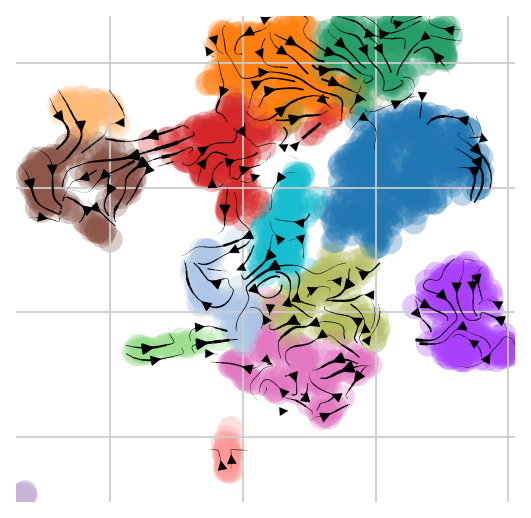

In [58]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['leiden'], legend_loc='none', title='', use_raw=False, frameon=False)#, save='type1_from_2nd_try.pdf')

computing velocity graph (using 1/16 cores)


  0%|          | 0/1832 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 2 regions of root cells and 2 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


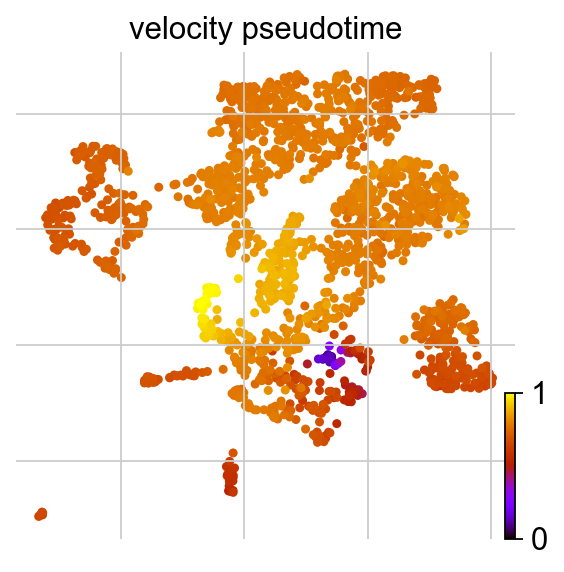

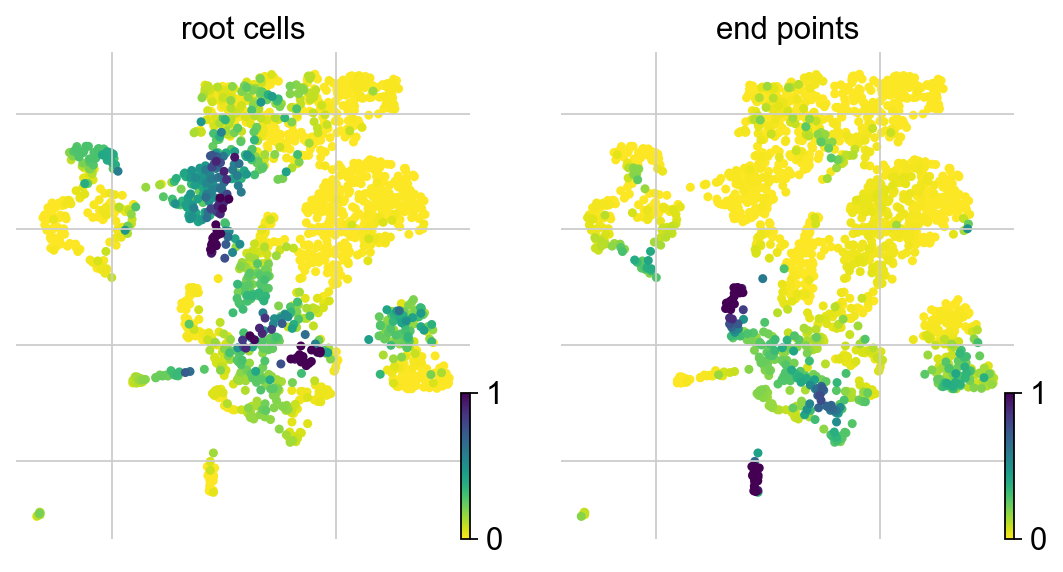

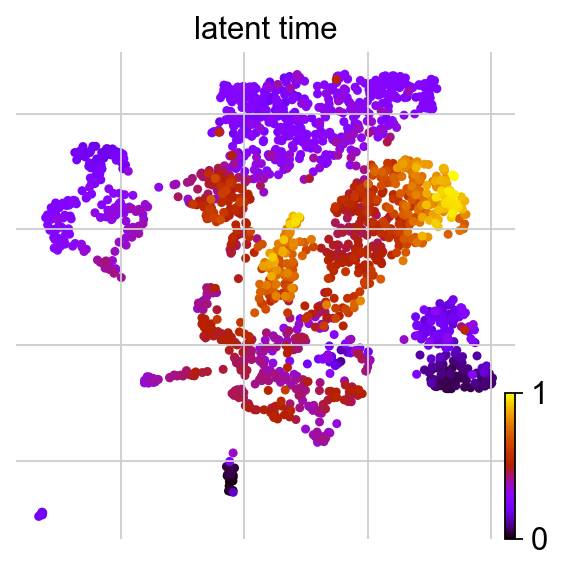

In [59]:
###### for the latent_time Umap ############
##### mode_neighbors can be removed#########
##### save the plots after comparison######

scv.tl.velocity_graph(adata,n_neighbors=10, mode_neighbors='connectivities')
scv.tl.terminal_states(adata)
scv.tl.latent_time(adata)

scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')
scv.pl.scatter(adata, color=['root_cells', 'end_points'])
scv.pl.scatter(adata, color='latent_time', cmap='gnuplot')


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo__stream_umap_1.svg


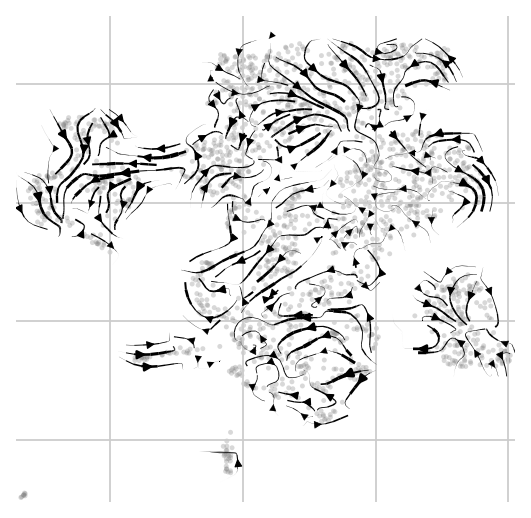

In [60]:
# n =10 
scv.pl.velocity_embedding_stream(adata, density=2, min_mass=0 
                                 ,cutoff_perc=0,arrow_size=0.75, 
                                 basis='umap',frameon=False ,legend_loc='right margin', 
                                 size=20, save='_stream_umap_1.svg')

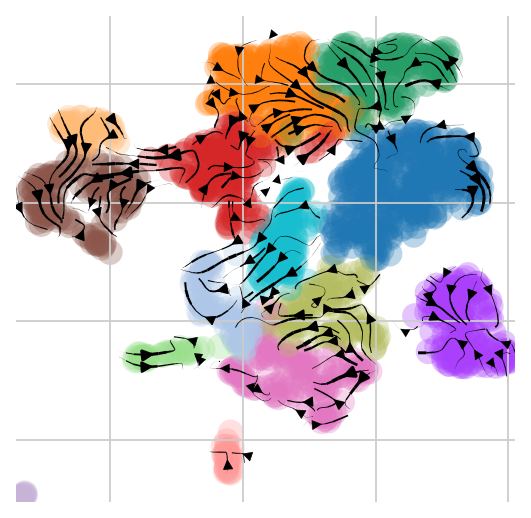

In [61]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['leiden'], legend_loc='none', title='', use_raw=False, frameon=False)#, save='type1_from_2nd_try.pdf')

In [62]:
##n_neighbors=10 test ###This was the best
## n_pcs increased to make more clusters =50

scv.pp.moments(adata, n_pcs=50, n_neighbors=20)
adata

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


AnnData object with n_obs × n_vars = 1832 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'vel

computing velocity graph (using 1/16 cores)


  0%|          | 0/1832 [00:00<?, ?cells/s]

    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


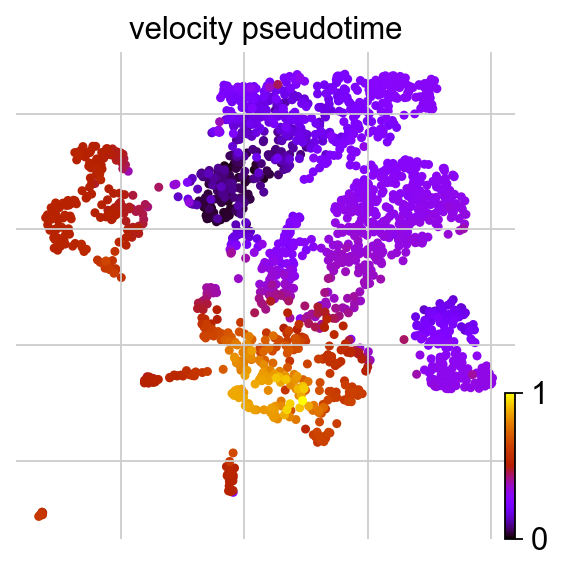

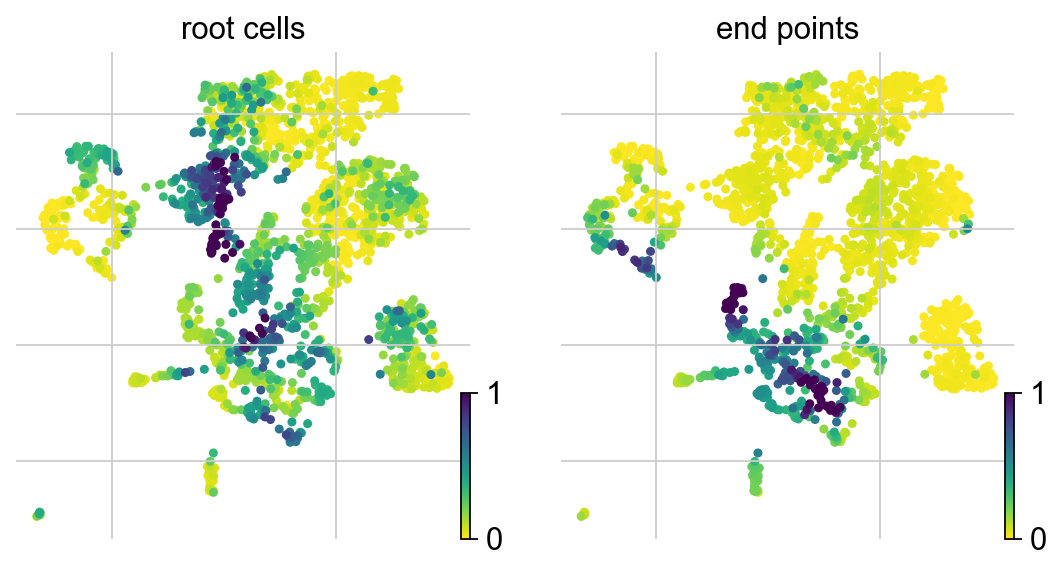

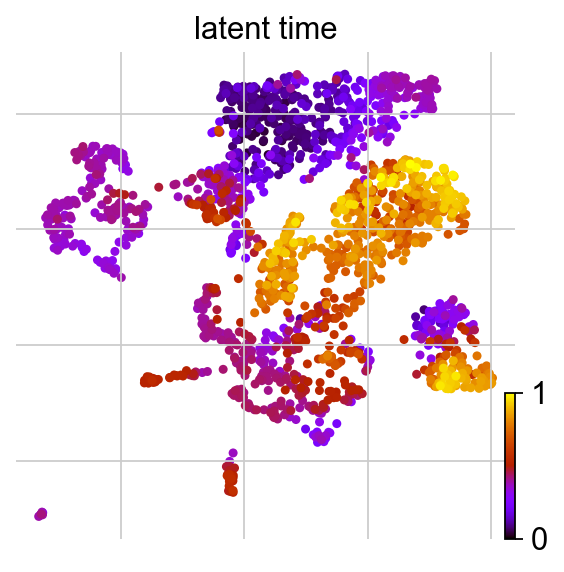

In [63]:
## for the latent_time Umap ############
##### mode_neighbors can be removed#########
##### save the plots after comparison######

scv.tl.velocity_graph(adata,n_neighbors=20, mode_neighbors='connectivities')
scv.tl.terminal_states(adata)
scv.tl.latent_time(adata)

scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')
scv.pl.scatter(adata, color=['root_cells', 'end_points'])
scv.pl.scatter(adata, color='latent_time', cmap='gnuplot')


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


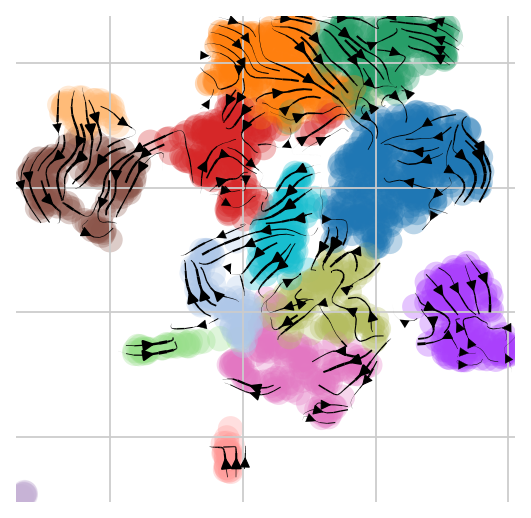

In [64]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['leiden'], legend_loc='none', title='', use_raw=False, frameon=False)#, save='type1_from_2nd_try.pdf')

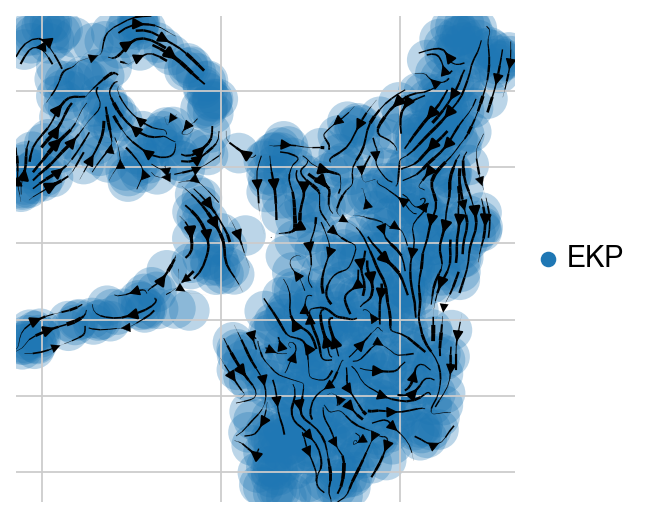

In [176]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['type'], legend_loc='right margin', title='', use_raw=False, frameon=False)#, save='type1_from_2nd_try.pdf')

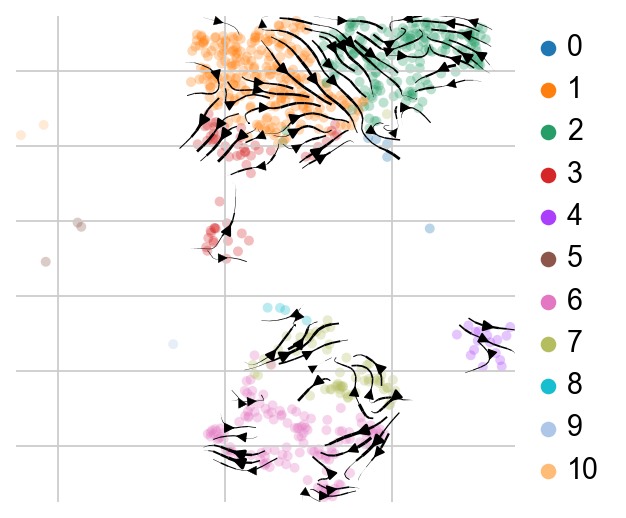

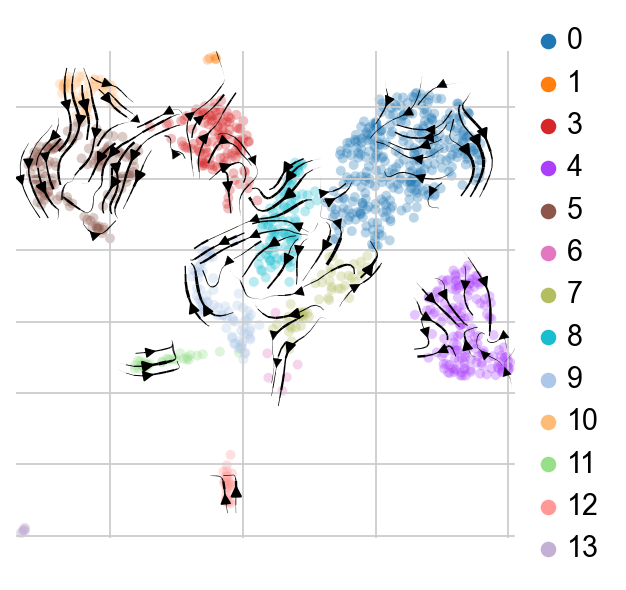

In [31]:
scv.pl.velocity_embedding_stream(adata[adata.obs['type']=='EKP'], basis='umap', color=['leiden'],size=80, legend_loc='right margin', title='', use_raw=False, frameon=False)#, save='type1_from_2nd_try.pdf')
scv.pl.velocity_embedding_stream(adata[adata.obs['type']=='RKP'], basis='umap', color=['leiden'],size=80, legend_loc='right margin', title='', use_raw=False, frameon=False)#, save='type1_from_2nd_try.pdf')

In [68]:
adata.write('scvelo_adata_2nd_try.h5ad', compression='gzip')

In [36]:
adata = sc.read('scvelo_adata_2nd_try.h5ad')

# Check

In [82]:
scv.tl.rank_velocity_genes(adata, groupby='leiden', min_corr=0.4)
df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


0        1         2       3         4        5       6  \
0       Tecr   Spred1      Wnk1     Trf  Hsp90ab1  Tmem189  Phldb2   
1        Gda     Irs2  Hs3st3b1  S100a4     Cxcl2    Basp1   Mast4   
2   Hsp90ab1    Nfkb1     Foxn3    Mxd1      Mxd1    Ifrd1   Tead1   
3     S100a6     Pdpn    Agpat4    Smox    S100a8    Ndrg1   Myo5b   
4     Tyrobp    Mmp12   Slc15a2  Tnrc18    S100a4   Gpr141   Mecom   
..       ...      ...       ...     ...       ...      ...     ...   
95       Syk     Dna2    S100a6  Fam49a     Gcnt2    Apbb2  Rnf217   
96       Dse    Tead1      Sdc4     Dse    Iqgap1    Slit2   Mmp12   
97     Hif1a  Csf2rb2     Rab1a  March1    S100a6   Picalm   Fem1c   
98    Adgrl2   S100a8     Hells     Syk     Spsb1   Adgre5   Pde4b   
99     Ciita    Rab1a      Epn2   Crtc3   St6gal1     Irf4  Pcyt1a   

                7       8        9             10       11        12  \
0          Hpcal1    Plek   Sorbs2           Dna2     Add3     Il1r2   
1          S100a6  Malat1    Slit2          Wdfy4   Osgin2     Ifrd1   
2         Tmem131    Tecr    Mecom         March1    Ndrg1      Cd80   
3          S100a4     Fn1    Apbb2  4930523C07Rik    Basp1    Ranbp2   
4          Tyrobp   Il1r2    Myo5b        Ankrd44     Cd80    Sqstm1   
..            ...     ...      ...            ...      ...       ...   
95  4930523C07Rik    Irs2     Irs2            Fn1   Ythdc1       Sp3   
96            App  Phldb2    Cd274           Irs2   Sorbs2     Ciita   
97           Pdpn   Foxn3  Specc1l          Mecom  St6gal1     Foxn3   
98         Ranbp2   Ciita    Furin         S100a6    Myo5b     Mysm1   
99         Slc2a1  Adgrl2    Hif1a           Pdpn    Wdfy4  Hs3st3b1   

               13  
0            Sdc4  
1         Tmem131  
2            Mxd1  
3          Picalm  
4           Ero1l  
..            ...  
95         Srgap2  
96          Mast4  
97            Dst  
98  4930523C07Rik  
99           Dna2  

[100 rows x 14 columns]

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


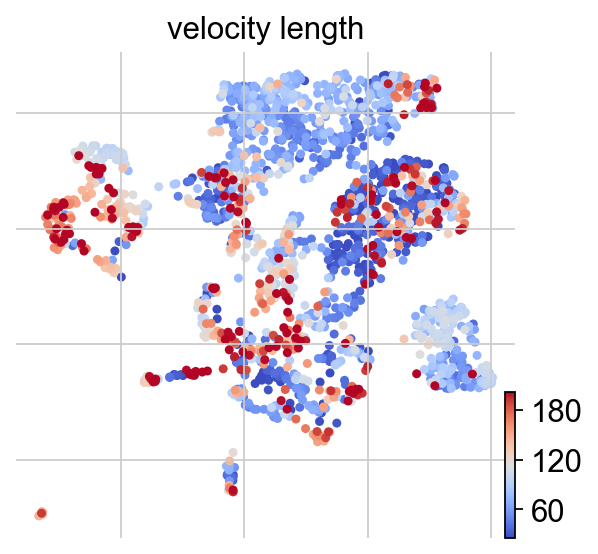

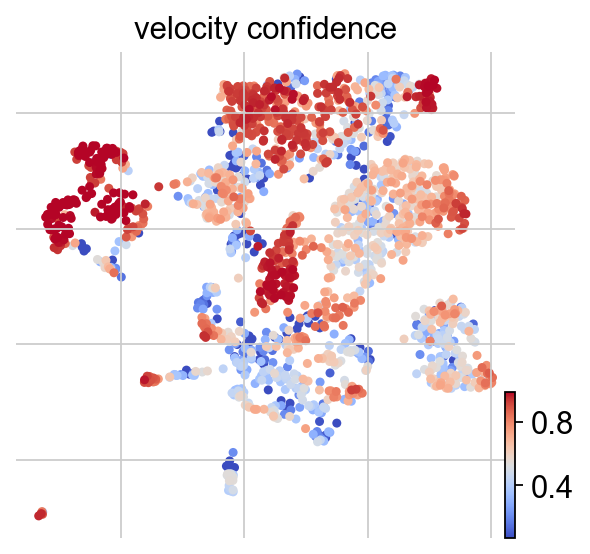

In [83]:
scv.tl.velocity_confidence(adata)
scv.pl.scatter(adata, c=['velocity_length'], cmap='coolwarm', perc=[5, 95], use_raw=False)
scv.pl.scatter(adata, c=['velocity_confidence'], cmap='coolwarm', perc=[5, 95], use_raw=False)

In [84]:
df = adata.obs.groupby('leiden')['velocity_length', 'velocity_confidence'].mean().T
df.style.background_gradient(cmap='coolwarm', axis=1)

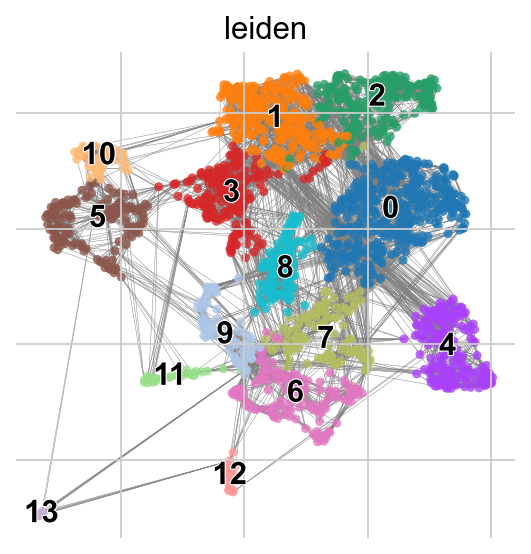

In [85]:
scv.pl.velocity_graph(adata, color=['leiden'], threshold=0.1)

computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/scvelo_scatter_scvelo_latent_time.pdf


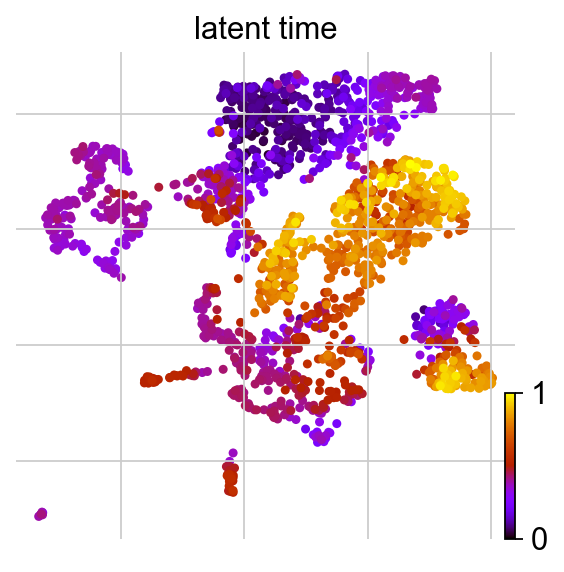

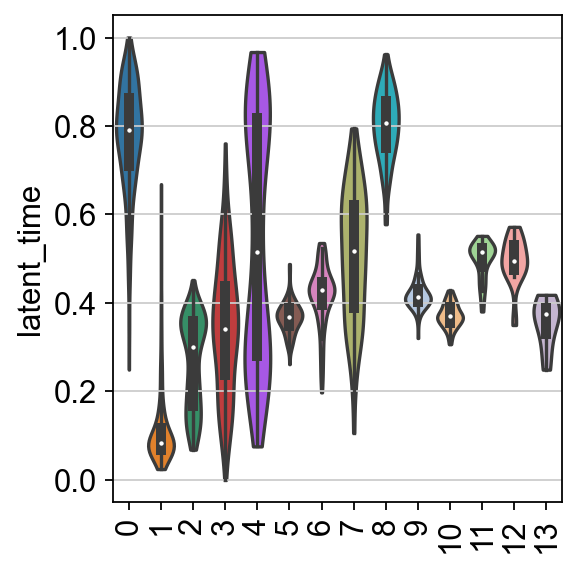

In [178]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', use_raw=False, frameon=False, save='scatter_scvelo_latent_time.pdf')
sc.pl.violin(adata, keys=["latent_time"], groupby="leiden", use_raw=False, stripplot=False, rotation=90, save="violin_scvelo_latent_time.pdf", inner='box')
adata.obs.to_csv('scvelo_adata_obs.csv')

In [87]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

running PAGA using priors: ['latent_time']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)
saving figure to file ./figures/scvelo_paga_scvelo.pdf


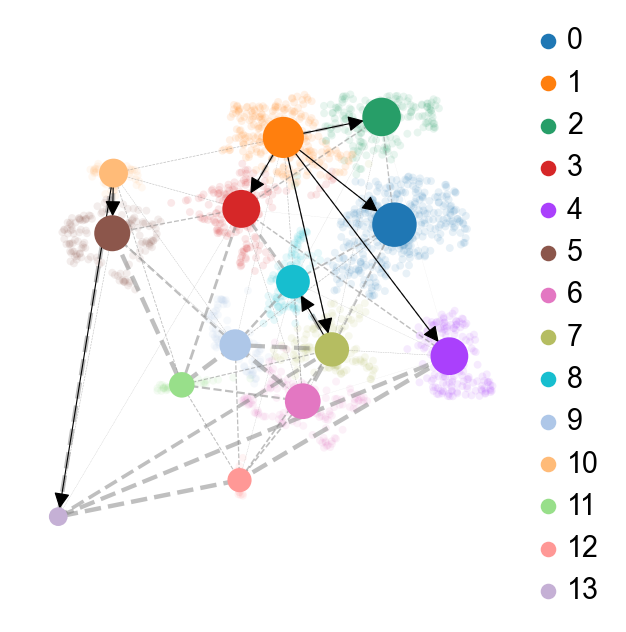

In [88]:
scv.tl.paga(adata, groups='leiden', vkey='velocity', use_time_prior="latent_time")
scv.pl.paga(adata, basis='umap', vkey='velocity', color='leiden', title='', size=50, alpha=0.1, min_edge_width=0.5, node_size_scale=1.5, use_raw=False, save='paga_scvelo.pdf')

saving figure to file ./figures/scvelo_heatmap__scvelo_heatmap.pdf


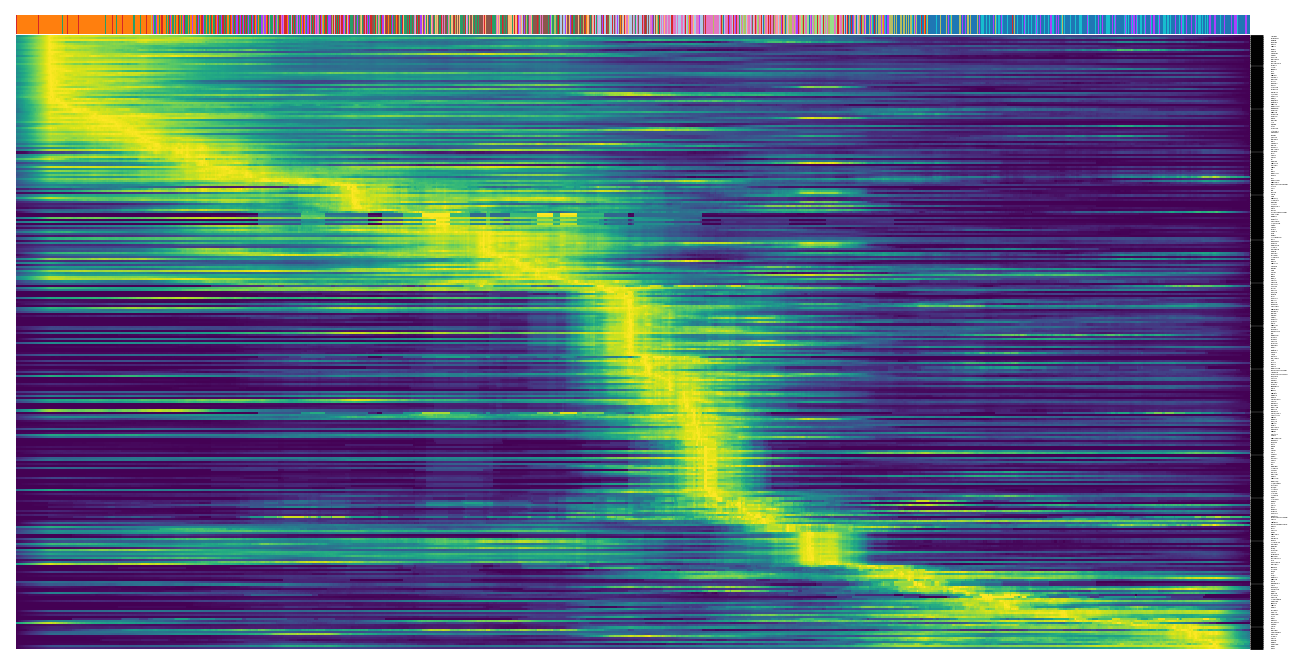

In [89]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='leiden', n_convolve=100, yticklabels=True, font_scale=0.1, save='_scvelo_heatmap.pdf')

In [90]:
adata.write('scvelo_adata_2nd_try_final_integrated.h5ad')

In [5]:
adata= sc.read('scvelo_adata_2nd_try_final_integrated.h5ad')
adata

AnnData object with n_obs × n_vars = 1832 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'type', 'leiden', 'batch', 'sample_batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    var: 'gene_ids_2', 'feature_types_2', 'mt_2', 'n_cells_2-0', 'n_cells_by_counts_2-0', 'mean_counts_2-0', 'pct_dropout_by_counts_2-0', 'total_counts_2-0', 'n_cells_2-1', 'n_cells_by_counts_2-1', 'mean_counts_2-1', 'pct_dropout_by_counts_2-1', 'total_counts_2-1', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', '

# Check

# overwrite scvelo info to processed file

In [9]:
processed

AnnData object with n_obs × n_vars = 1832 × 20470
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'EKP_RKP_Tumor_rank_fgsea', 'Leiden_Tumor_rank_fgsea', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

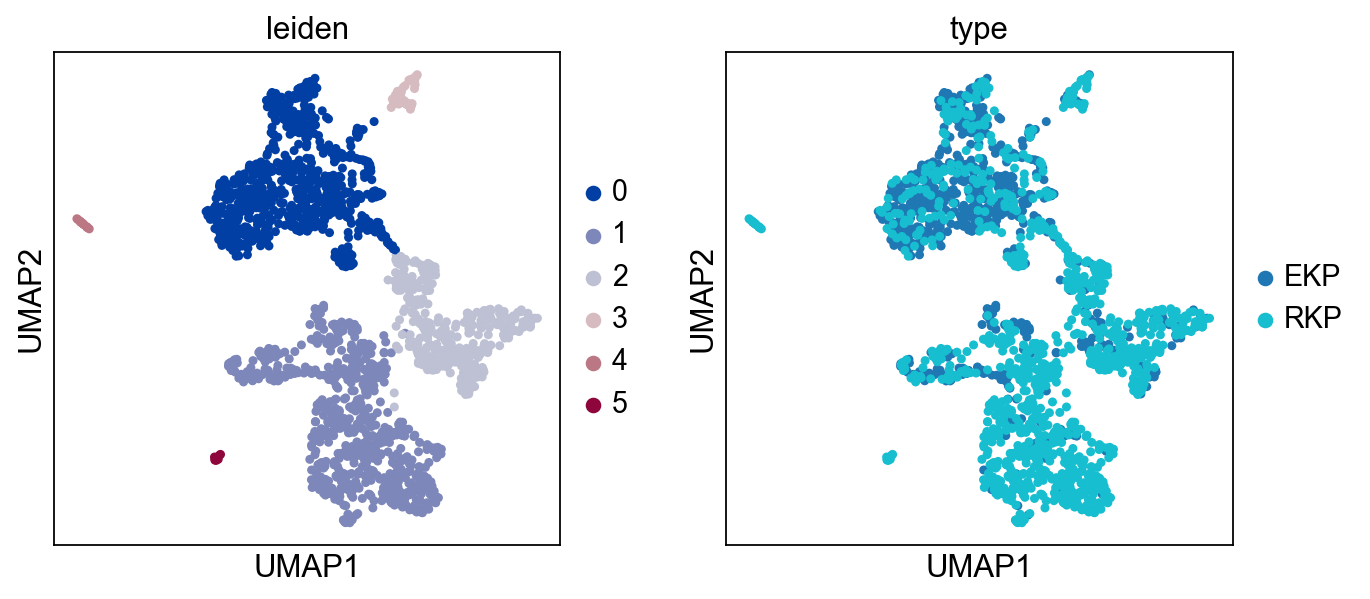

In [19]:
sc.pl.umap(processed, color=['leiden','type'])

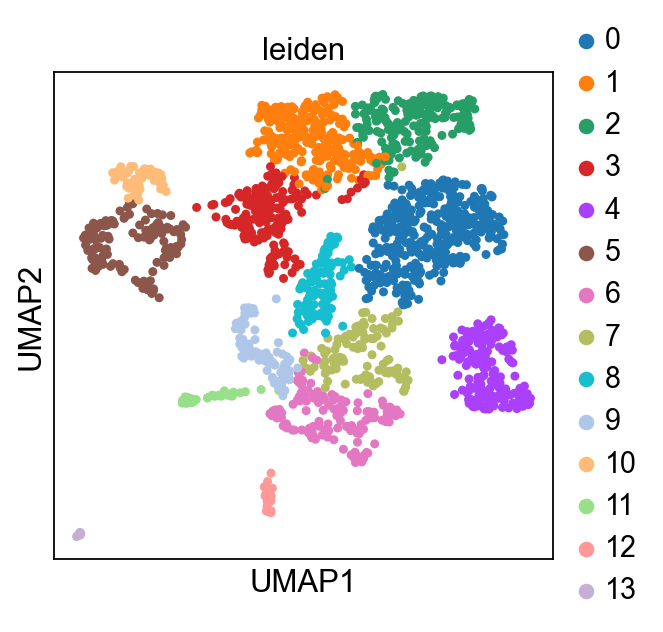

In [8]:
sc.pl.umap(adata, color=['leiden'])

In [57]:
processed.obs['scvelo_leiden'] = adata.obs['leiden']
processed.obs['velocity_length'] = adata.obs['velocity_length']

processed.uns['scvelo_umap'] = adata.uns['umap']

processed.obsm['velocity_umap'] = adata.obsm['velocity_umap']
processed.obsm['X_scvelo_umap'] = adata.obsm['X_umap']

#processed.layers['velocity'] = adata.layers['velocity']


In [58]:
adata.uns['scanpy_umap'] = processed.uns['umap']
adata.obsm['X_scanpy_umap'] = processed.obsm['X_umap']

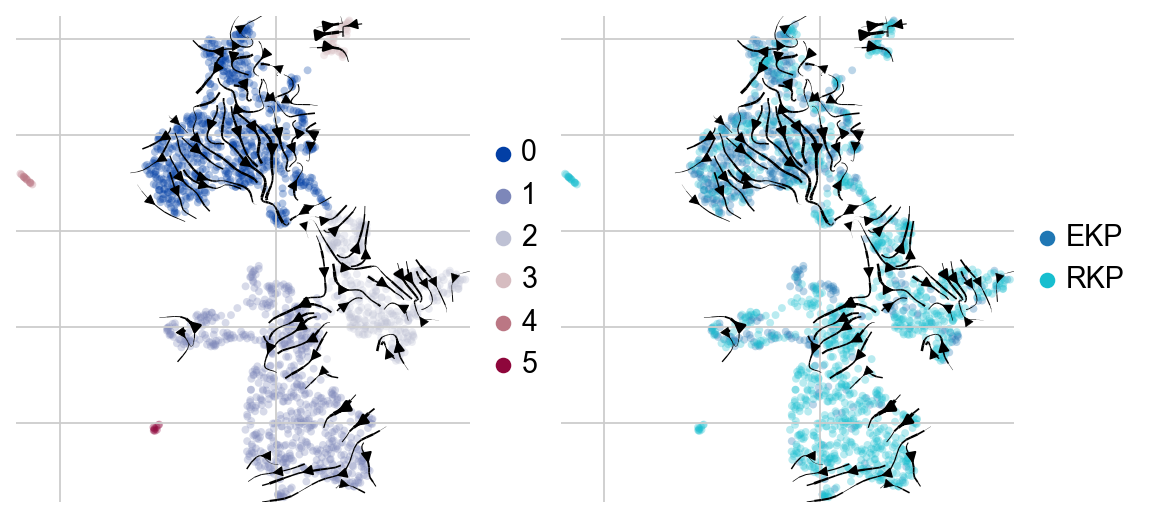

In [30]:
scv.pl.velocity_embedding_stream(processed, basis='umap', color=['leiden','type'],size=50, legend_loc='right margin', title='', use_raw=False, frameon=False)#, save='type1_from_2nd_try.pdf')

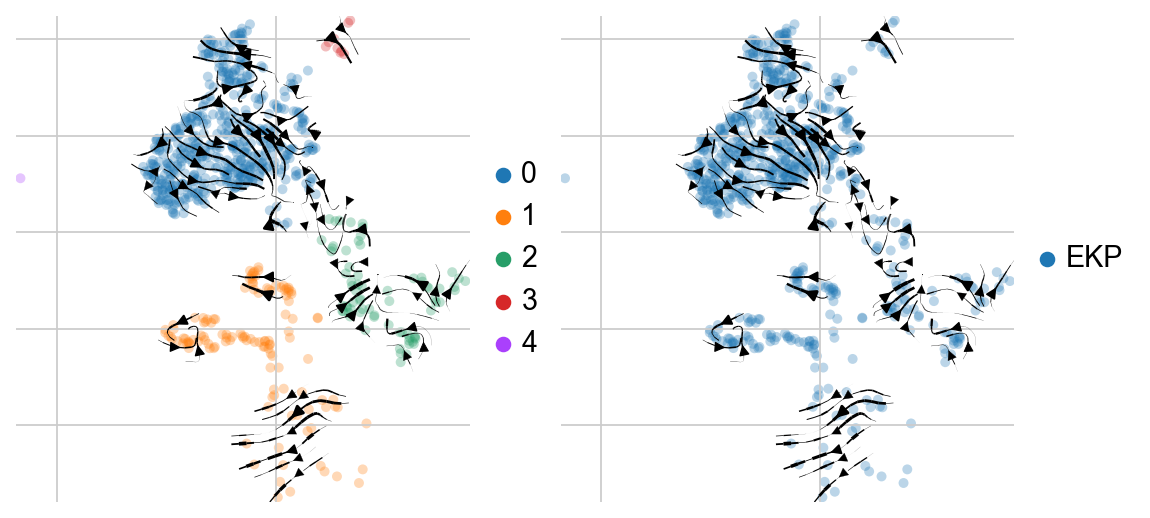

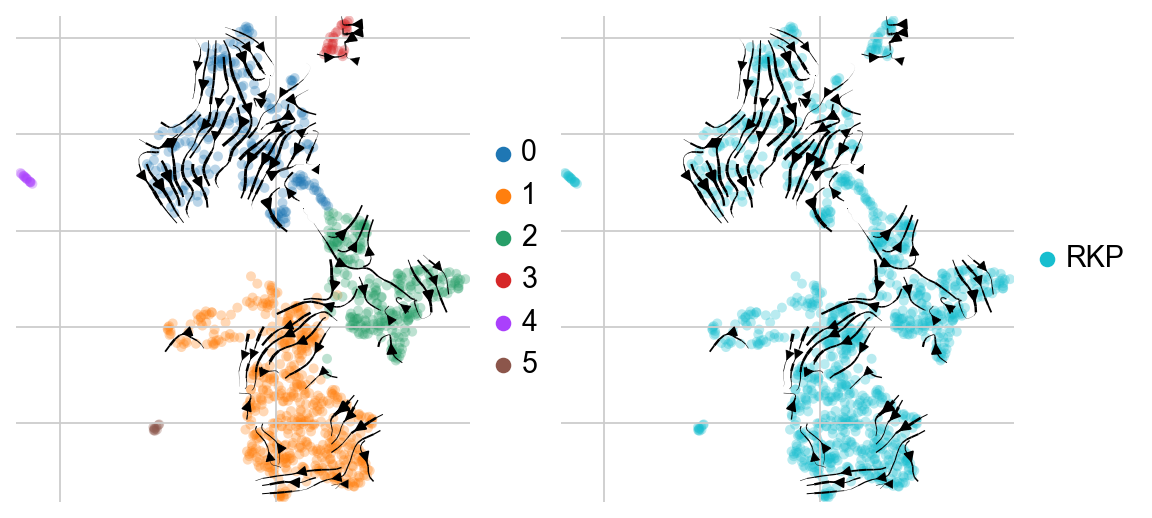

In [32]:
scv.pl.velocity_embedding_stream(processed[processed.obs['type']=="EKP"], basis='umap', color=['leiden','type'],size=80, legend_loc='right margin', title='', use_raw=False, frameon=False)#, save='type1_from_2nd_try.pdf')
scv.pl.velocity_embedding_stream(processed[processed.obs['type']=="RKP"], basis='umap', color=['leiden','type'],size=80, legend_loc='right margin', title='', use_raw=False, frameon=False)#, save='type1_from_2nd_try.pdf')